## CASO 2: CRIME

In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar los datos
crime_data = pd.read_csv("crime_data.csv", sep=",")

# Exploración de los datos
print(crime_data.info())
print(crime_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None
         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000


In [4]:
# Escalar las variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(crime_data.iloc[:, 1:])  # Excluye el nombre del estado

# Determinar el número óptimo de clústeres
sse = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

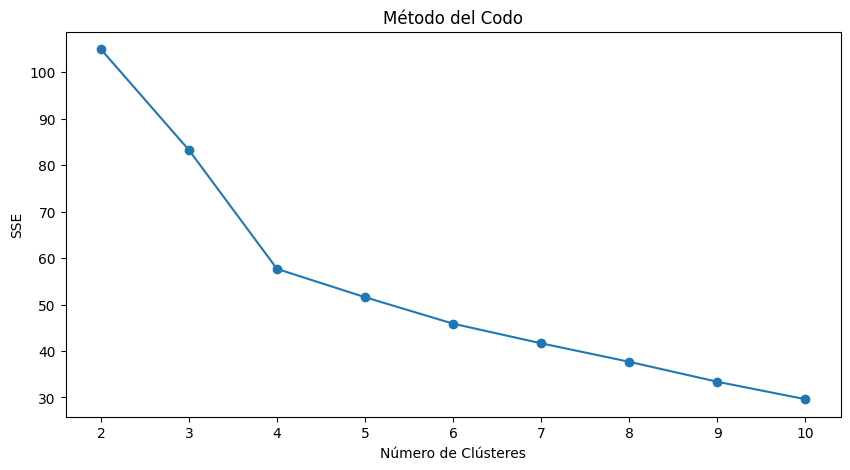

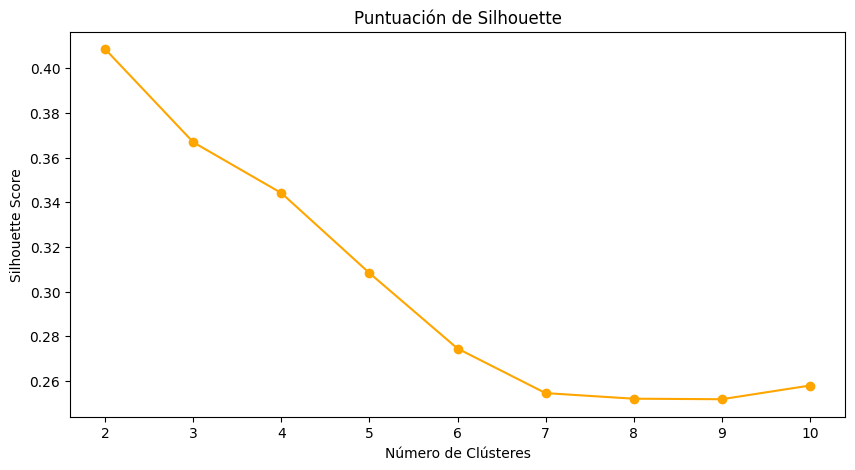

In [5]:
# Graficar el método del codo
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), sse, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('SSE')
plt.show()

# Graficar la puntuación de Silhouette
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title('Puntuación de Silhouette')
plt.xlabel('Número de Clústeres')
plt.ylabel('Silhouette Score')
plt.show()

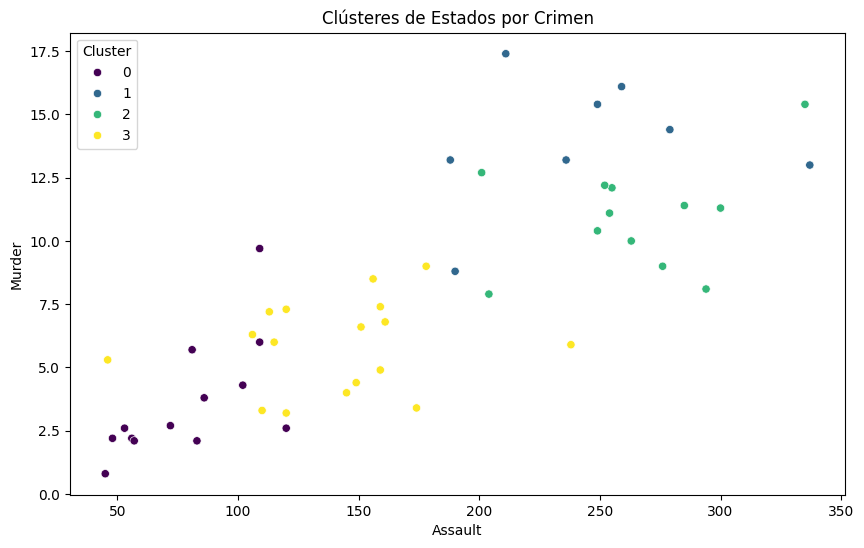

In [7]:
# Elegir el número óptimo de clústeres (por ejemplo, k=4 basado en el análisis)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
crime_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualización de los clústeres
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=crime_data['Assault'], y=crime_data['Murder'], hue=crime_data['Cluster'], palette='viridis'
)
plt.title('Clústeres de Estados por Crimen')
plt.show()

In [9]:
# Mostrar los centroides
centroids = kmeans.cluster_centers_
print("Centroides de los clústeres (en escala estandarizada):\n", centroids)

# Listar los estados y su clúster correspondiente
print(crime_data[['State', 'Cluster']].head())

Centroides de los clústeres (en escala estandarizada):
 [[-0.97130281 -1.11783581 -0.93954982 -0.97657842]
 [ 1.42622412  0.88321132 -0.82279055  0.01946669]
 [ 0.73721295  1.13018079  0.76486721  1.33477166]
 [-0.44878894 -0.35858791  0.56576856 -0.20455729]]
        State  Cluster
0     Alabama        1
1      Alaska        2
2     Arizona        2
3    Arkansas        1
4  California        2
